In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


**DATA PREPROCESSING**

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
new-plant-diseases-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


**EXTRACTING ZIP FILE**

In [ ]:
import zipfile
import os

# Define the path for the zip file and extraction destination
zip_path = '/content/new-plant-diseases-dataset.zip'
extracted_path = '/content/new-plant-diseases-dataset'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# Verify the extraction
os.listdir(extracted_path)

['test',
 'New Plant Diseases Dataset(Augmented)',
 'new plant diseases dataset(augmented)']

In [ ]:
import os

extracted_path = '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)'
os.listdir(extracted_path)

['New Plant Diseases Dataset(Augmented)']

In [ ]:
extracted_folder =  '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'
os.listdir(extracted_folder)

['valid', 'train']

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf

**SPLITTING THE DATASET INTO TRAIN AND VALID SETS**

In [ ]:
# Load the Training images with 20% of it as Validation.
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/',
    labels="inferred", # The folder name become the class label
    class_names=None,
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224), # resizing images (size uniformity)
    interpolation="bilinear",
    crop_to_aspect_ratio=False, # resizes without preserving the original aspect ratio
    shuffle=True,
    seed=42,  # Seed for reproducibility
    validation_split=0.2,  # 20% for validation
    subset='training',     # Select training subset
    follow_links=False
)

Found 70295 files belonging to 38 classes.
Using 56236 files for training.


In [ ]:
# Load the Training images with 20% of it as Validation.
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/',
    labels="inferred", # The folder name become the class label
    class_names=None,
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(224,224), #resize image for validation set
    interpolation="bilinear",
    crop_to_aspect_ratio=False, # resizes without preserving the original aspect ratio
    shuffle=True,
    seed=42,  # Seed for reproducibility
    validation_split=0.2,  # 20% for validation
    subset='validation',     # Select training subset
    follow_links=False
)

Found 70295 files belonging to 38 classes.
Using 14059 files for validation.


In [ ]:
# Load the Test images
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128), # resizing images to 128x128 for test images
    shuffle=False,
    seed=42,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

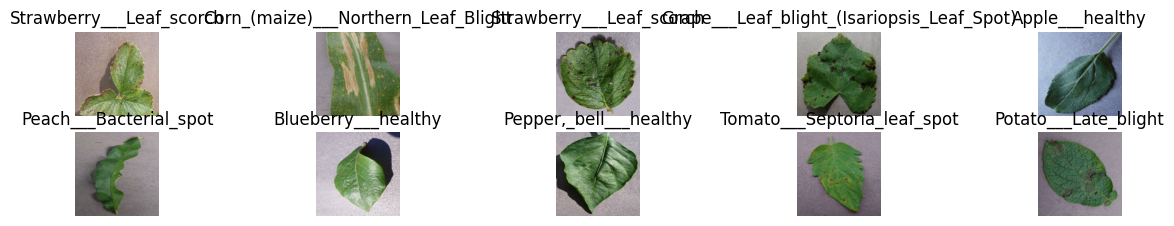

In [ ]:
# Fetch a batch of data from the dataset
class_names = training_set.class_names
plt.figure(figsize=(15, 5))  # Adjust figure size for 2 rows and 5 columns

# Loop through the first batch (first 10 images) in the dataset
for images, labels in training_set.take(1):  # Take one batch of data
    for i in range(10):  # We only want to display 10 images
        ax = plt.subplot(4,5, i + 1)  # 5 rows, 5 columns
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert image tensor to uint8 for display
        plt.title(class_names[labels[i].numpy().argmax()])  # Display class name based on the label
        plt.axis("off")  # Turn off the axis display


**Training Set Analyzing(Displaying file names)**

In [ ]:
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

**NORMALIZATION**

In [ ]:
from tensorflow.keras.layers import Rescaling

# Create a normalization layer that scales pixel values to [0, 1]
normalization_layer = Rescaling(1./255)
training_set = training_set.map(lambda x, y: (normalization_layer(x), y))

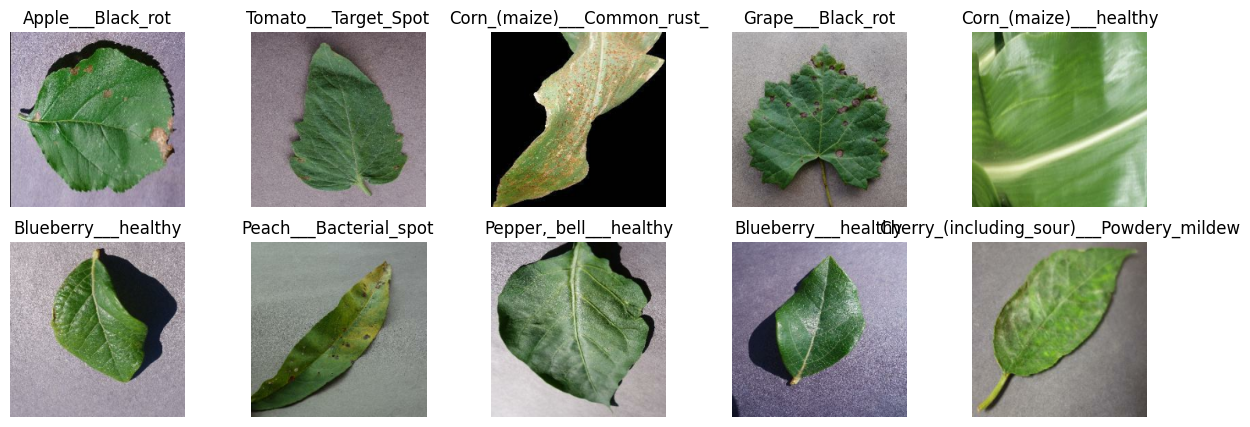

In [ ]:
# class_names = training_set.class_names (Same as before)

plt.figure(figsize=(15, 5))  # Adjust figure size for 2 rows and 5 columns

# Loop through the first batch (first 10 images) in the dataset
for images, labels in training_set.take(1):
    for i in range(10):  # We only want to display 10 images
        ax = plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns for 10 images
        plt.imshow((images[i].numpy() * 255.0).astype("uint8"))  # Convert normalized image to uint8 for display
        plt.title(class_names[tf.argmax(labels[i]).numpy()])  # Use tf.argmax for one-hot encoded labels
        plt.axis("off")  # Turn off the axis display

plt.show()

**VALIDATION SET**

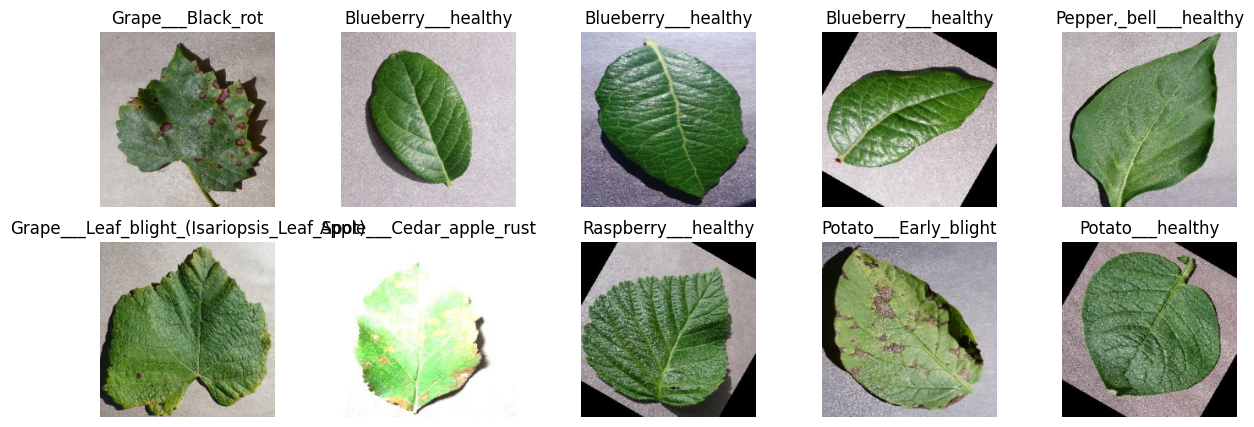

In [78]:
normalized_validation_set = validation_set.map(lambda x, y: (normalization_layer(x), y))

# Display some normalized images from the validation set
class_names = validation_set.class_names

# Fetch a batch of data from the normalized validation set
plt.figure(figsize=(15, 5))  # Adjust figure size for 2 rows and 5 columns

# Loop through the first batch (first 10 images) in the dataset
for images, labels in normalized_validation_set.take(1):  # Take one batch of data
    for i in range(10):  # We only want to display 10 images
        ax = plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns for 10 images
        plt.imshow(images[i].numpy())  # Display the normalized image (pixel values [0, 1])
        plt.title(class_names[tf.argmax(labels[i]).numpy()])  # Display class name based on the label and setting text size
        plt.axis("off")  # Turn off the axis display

plt.show()